<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Datenverarbeitung in Pandas</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

## Ersten Manipulationen von Dataframes

Beginnen wir mit dem Hinzufügen von Daten.
Wir arbeiten dabei wieder hauptsächlich mit dem *Titanic* Dataset.

In [2]:
import pandas as pd
import os

In [3]:
# Wir fügen nun einen fiktionalen Datensatz hinzu
path = os.path.join("..", "..", "_data", "titanic.csv")
titanic = pd.read_csv(path)

new_row = {'pclass': 1, 'survived': 1, 'name': 'Alice Burger', 'sex': 'female', 'age': 35, 'sibsp': 0, 'parch': 0, 'ticket': '12345', 'fare': 50.0, 'cabin': 'C10', 'embarked': 'S', 'home.dest': 'New York'}
new_df = pd.DataFrame(new_row, index=[0])
titanic = pd.concat([titanic, new_df], ignore_index=True)

In [ ]:
titanic

In [4]:
# Für mehrere Daten zum hinzufügen können wir auch eine Liste von Dictionaries verwenden
new_row_1 = {'pclass': 1, 'survived': 1, 'name': 'Alice Burger', 'sex': 'female', 'age': 35, 'sibsp': 0, 'parch': 0, 'ticket': '12345', 'fare': 50.0, 'cabin': 'C10', 'embarked': 'S', 'home.dest': 'New York'} # sind zBsp Zwillinge :D
new_row_2 = {'pclass': 1, 'survived': 1, 'name': 'Bob Burger', 'sex': 'male', 'age': 35, 'sibsp': 0, 'parch': 0, 'ticket': '12345', 'fare': 50.0, 'cabin': 'C10', 'embarked': 'S', 'home.dest': 'New York'} # sind zBsp Zwillinge :D

new_data = [new_row_1, new_row_2]
new_df = pd.DataFrame(new_data, index=[0, 1])

titanic = pd.concat([titanic, new_df], ignore_index=True)

In [ ]:
titanic

Duplikate können auch entfernt werden

In [6]:
titanic.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
titanic

Nun betrachten wir die eindeutigen Zeilenwerte in einem Dataframe. Dafür benutzen wir den Befehl `unique()` bzw. `nunique()`

In [ ]:
# Anzahl der eindeutige Werte in allen Spalten anzeigen lassen
titanic.nunique()

In [ ]:
# Eindeutige Werte in einer Spalte anzeigen lassen

column = 'sibsp' # Andere interessante Fälle: 'boat'
titanic[column].unique()

In [ ]:
# Wir können auch die eindeutigen Werte und deren Anzahl anzeigen lassen

column = 'sibsp'

titanic[column].value_counts()

In vielen Fällen sind nicht alle Spalten relevant, diese können mit dem Befehl `drop()` entfernt werden. Welche Spalten soll man entfernen, welche Spalten sollte man nicht entfernen?

In [11]:
# Drop columns
titanic.drop(columns=['boat', 'body'], inplace=True) # erneut inplace Option um Speicherplatz zu sparen

Wie bereits gesehen können aber auch Zeilen "gedroppt" werden, dies passiert mittels geschickter indizierung. Für den Fall, dass <em>leere</em> Werte gelöscht werden sollen, gibt es nach wie vor den Befehl `dropna()`. Dieses mal spezifizieren wir dabei eine spezielle Achse. Merksatz in diesem Fall (und auch bei Matrizen): "Zeilen zuerst, Spalten später"

In [12]:
# Spalten, welche leere Werte enthalten, können auch auch mit dem dropna() Befehl entfernt werden, dazu braucht es das Argument axis=1
titanic.dropna(axis=1, inplace=True) # Vergleiche mit letzter Woche: dropna() entfernt Zeilen mit leeren Werten

In [ ]:
titanic

Wir laden nun das Dataset erneut um die bisherigen Änderungen zu verwerfen.

In [14]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

Wollen wir Daten aggregieren, so können wir den `agg()` Befehl verwenden. Wo kann dies nützlich sein? Für welche Datentypen funktionieren welche Aggregierungsmöglichkeiten?

In [15]:
agg_df = titanic.agg(['count', 'size', 'nunique'])

In [ ]:
agg_df

Weitere Möglichkeiten sind `sum`, `mean`, `median`, `std`, `var`, `min`, `max`, etc. --> Wir werden später genauer auf Statistiken eingehen.

In [17]:
# Eine weitere Möglichkeit ist es, Funktionen auf die Daten anzuwenden
titanic['increased_age'] = titanic['age'].apply(lambda x: x + 1)

In [ ]:
titanic

In [19]:
titanic.drop(columns=['increased_age'], inplace=True)

In [20]:
# Wir können groupby verwenden, um die Daten zu gruppieren
grouped_df = titanic.groupby('pclass')

Wir können nun mit dem gruppierten Dataframe `grouped_df` arbeiten

In [21]:
count_values = grouped_df.size()

In [ ]:
count_values

In [ ]:
for name, group in grouped_df:    
    print(name)
    print(group)
    print("*"*50)

In [24]:
survival_rate = titanic.groupby('pclass')['survived'].mean()

In [ ]:
survival_rate

---

## Fehlende Werte/Datenpunkte

* In vielen Fällen werden Daten nicht perfekt sein
* Daten können:
    * fehlerhaft/falsch sein bzw. mit Rauschen überlagert
    * "unmöglich" sein (Zum Beispiel: männlich und schwanger)
    * fehlen

Es gibt verschiedene Möglichkeiten, wie diese Probleme behandelt werden können.

In [5]:
# Sanity Checks. Wir laden zuerst ein modifiziertes Dataset

modified_titanic = pd.read_csv(path.replace("titanic", "modified_titanic"), header=0, sep=',', index_col=False, decimal='.')

In [6]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


Welche(n) Fehler vermuten wir hier? 

In [7]:
# Testen, ob alter "age" negativ ist:
negative_age = modified_titanic['age'] < 0

if negative_age.any():
    print("Es gibt negative Werte für das Alter")
else:
    print("Alle Werte in der Spalte Alter sind nicht-negativ (positiv oder 0)")

Es gibt negative Werte für das Alter


In [8]:
# Wie sieht das Objekt negative_age aus:
negative_age

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [9]:
# Wir können auch die genaue Anzahl der negativen Werte anzeigen lassen
negative_age_count = negative_age.sum()
print(f"Anzahl der negativen Werte für das Alter: {negative_age_count}")

Anzahl der negativen Werte für das Alter: 9


In [10]:
modified_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1037 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 143.3+ KB


In [11]:
modified_titanic['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1037 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


Nun müssen wir etwas mit diesen falschen/fehlerhaften Daten unternehmen. Wir können:

* NaN oder anderen wiedererkennbaren Wert vergeben (0, -1) (Vorteile? Nachteile?)
* Mittelwert vergeben (Vorteile? Nachteile?)
* Werte der Zeilen geben, die sich darüber/darunter befinden (Vorteile? Nachteile?)
* Diese Daten=Zeilen entfernen (Vorteile? Nachteile?)

In [12]:
# NaN vergeben für die negativen Werte
modified_titanic.loc[negative_age, 'age'] = None # negative_age = modified_titanic['age'] < 0 (von vorher)

In [13]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [14]:
modified_titanic['age'].info() # nun sind in der Spalte "age" weniger Werte vorhanden (mehr Werte sind NaN)

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [15]:
# Ersetzen von negativen Alter mit Mittelwert
mean_age = modified_titanic['age'].mean()
modified_titanic.loc[negative_age, 'age'] = mean_age

In [16]:
print(mean_age)

29.885619357976655


In [17]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [18]:
modified_titanic['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1037 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [19]:
modified_titanic['age'] = modified_titanic['age'].bfill() # Ersetzt alle fehldenden Werte der Spalte age mit dem nächsten vorhandenen Wert

In [20]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,20.0,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [21]:
modified_titanic['age'].info() # nun gibt es keine NaN Werte mehr. WICHTIG: Es wurde kein negatives Alter hier ersetzt sondern nur NaN Werte (bisherige negative Werte sind aber aktuell auf mean_age gesetzt)

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [22]:
# Erneutes Laden des manipulierten Datensets
modified_titanic = pd.read_csv(path.replace("titanic", "modified_titanic"), header=0, sep=',', index_col=False, decimal='.')

In [23]:
# Eine weitere sehr praktische Variante ist es, die Methode fillna() zu verwenden
modified_titanic['age'] = modified_titanic['age'].fillna(mean_age)

In [24]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,29.885619,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.000000,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.000000,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.000000,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.000000,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.000000,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.000000,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.000000,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [25]:
modified_titanic['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [26]:
# Erneutes Laden des manipulierten Datensets
modified_titanic = pd.read_csv(path.replace("titanic", "modified_titanic"), header=0, sep=',', index_col=False, decimal='.')

In [27]:
# Zeilen entfernen, die negative Werte für das Alter enthalten, NaN Werte bleiben erhalten
modified_titanic = modified_titanic[modified_titanic['age'].ge(0) | modified_titanic['age'].isnull()] 

In [28]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [29]:
modified_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1300 non-null   object 
 1   survived   1300 non-null   int64  
 2   name       1300 non-null   object 
 3   sex        1300 non-null   object 
 4   age        1028 non-null   float64
 5   sibsp      1300 non-null   int64  
 6   parch      1300 non-null   int64  
 7   ticket     1300 non-null   object 
 8   fare       1299 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1298 non-null   object 
 11  boat       484 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  740 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 152.3+ KB


In [30]:
# andere Möglichkeit mit der Query Methode
modified_titanic = pd.read_csv(path.replace("titanic", "modified_titanic"), header=0, sep=',', index_col=False, decimal='.')

modified_titanic = modified_titanic.query('age >= 0 or age.isnull()') # Achtung: lässt NaN Werte bestehen

In [31]:
modified_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,Third Class,0,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S,NaN,NaN,NaN
1,Third Class,1,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,15,NaN,NaN
2,First Class,0,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S,NaN,NaN,London / Middlesex
3,Second Class,0,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
4,First Class,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S,5,NaN,"Boston, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,First Class,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,8,NaN,"New York, NY / Briarcliff Manor NY"
1305,First Class,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
1306,Third Class,0,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S,NaN,NaN,London
1307,Third Class,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,NaN,NaN,NaN


In [32]:
modified_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1300 non-null   object 
 1   survived   1300 non-null   int64  
 2   name       1300 non-null   object 
 3   sex        1300 non-null   object 
 4   age        1028 non-null   float64
 5   sibsp      1300 non-null   int64  
 6   parch      1300 non-null   int64  
 7   ticket     1300 non-null   object 
 8   fare       1299 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1298 non-null   object 
 11  boat       484 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  740 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 152.3+ KB


---

## Normalisierung

In vielen Fällen sind die gegebenen Daten nicht normalisiert. Dies kann erhebliche Nachteile mit sich bringen. Wann kann es nachteilig sein, Daten zu normalisieren? (Ausreißer)

Die folgende Abbildung zeigt, warum Normalisierung so wichtig ist. 

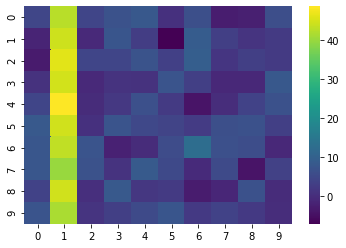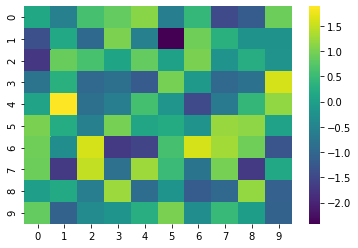

(von https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/)

Es gibt verschiedene Möglichkeiten, Daten zu normalisieren. Was sind die Vorteile und Nachteile? Wann eignen sich besondere Normalisierungsmethoden besonders gut bzw. schlecht? Was ist der Wertebereich von den neuen Daten?
* Min-Max Normalisierung $x' = \frac{x-\min x}{\max x-\min x}$
* z-Wert Normalisierung $x'=\frac{x-\mu}{\sigma}$
* Relative Skalierung: $x' = \frac{x}{\Sigma x}$ (Aufpassen auf negative Werte (Division durch 0?))
* Logarithmische Transformation: $x' = \log(x)$ bzw. $x'=\log(x+1)$
* $\ell_2$-Normalisierung (Längennormalisierung) $x'=\frac{x}{\sqrt{\Sigma_i x_i^2}}$

Es kann aber das Normalisieren oft auch einfach nur eine Konvertierung der Werte in eine andere Einheit bedeuten.

Durch das Normalisieren geht oftmals der Bezug zu den Werten/Daten verloren, auf dies muss bei Visualisierungen oder späteren Datenverarbeitung, insbesondere in Machine Learning Modellen berücksichtigt werden.

In [33]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.') # Achtung jetzt wieder normales Titanic Dataset

In [34]:
# min-max normalization
def min_max_normalization(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [35]:
columns = ['age', 'fare']
titanic = min_max_normalization(titanic, columns) # Die übergebenen Spalten sind nun im Bereich [-1, 1]

In [36]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.361169,0,0,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.009395,1,2,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0.022964,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.373695,1,2,113781,0.295806,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.311064,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,0.179540,1,0,2665,0.028213,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,0.028213,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,0.329854,0,0,2656,0.014102,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,0.336117,0,0,2670,0.014102,NaN,C,NaN,NaN,NaN


In [37]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

Ebenso möglich ist die Normalisierung mittels `sklearn`. Es kann installiert werden mit `conda install scikit-learn`.

In [38]:
from sklearn.preprocessing import MinMaxScaler

titanic[['age', 'fare']] = MinMaxScaler().fit_transform(titanic[['age', 'fare']])

In [39]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.361169,0,0,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.009395,1,2,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0.022964,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.373695,1,2,113781,0.295806,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.311064,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,0.179540,1,0,2665,0.028213,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,0.028213,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,0.329854,0,0,2656,0.014102,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,0.336117,0,0,2670,0.014102,NaN,C,NaN,NaN,NaN


In [40]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

In [41]:
# genauso bei der z-Score Normalisierung

def z_score_normalization(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [42]:
columns = ['age', 'fare']
titanic = z_score_normalization(titanic, columns)

In [43]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,-0.061133,0,0,24160,3.439849,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,-2.009535,1,2,113781,2.284729,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,-1.934376,1,2,113781,2.284729,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.008247,1,2,113781,2.284729,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,-0.338650,1,2,113781,2.284729,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,-1.067134,1,0,2665,-0.364022,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,-0.364022,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,-0.234581,0,0,2656,-0.503693,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,-0.199891,0,0,2670,-0.503693,NaN,C,NaN,NaN,NaN


In [44]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

Auch hierfür gibt es eine Funktion in `sklearn`

In [45]:
# auch hier gibt es eine Funktion in sklearn

from sklearn.preprocessing import StandardScaler

titanic[['age', 'fare']] = StandardScaler().fit_transform(titanic[['age', 'fare']])

In [46]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,-0.061162,0,0,24160,3.441165,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,-2.010496,1,2,113781,2.285603,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,-1.935302,1,2,113781,2.285603,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.008251,1,2,113781,2.285603,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,-0.338812,1,2,113781,2.285603,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,-1.067644,1,0,2665,-0.364161,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,-0.364161,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,-0.234693,0,0,2656,-0.503886,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,-0.199987,0,0,2670,-0.503886,NaN,C,NaN,NaN,NaN


---

## Datenskalen und deren Transformation

Viele Datenskalen sind nicht numerisch. Dies erschwert in manchen Fällen die weitere Verarbeitung. Grundsätzlich unterscheidet man 3 Typen von Daten:
1. Quantitative Daten
2. Ordinale Daten
3. Nominelle Daten

<b>Quantitative Daten</b>

* Numerische Typen
* Kann unterschieden werden in diskret und stetig
* Haben normalerweise eine (physikalische) Einheit

<b>Ordinale Daten</b>

* Kategorien
* Es gibt eine **sinnvolle Ordnung**
* **Keine** **Relation**/Verhältnis, zBsp. Kleidungsgröße L ist <b>nicht</b> $n$-mal so groß wie Kleidungsgröße M
* Beispiele: Kleidungsgrößen, Schulnoten, Job-Klassifizierung

<b>Nominale Daten</b>
* Kategorien
* **Keine** Reihenfolge/Ordnung
* Beispiele: Geschlecht, Farbe, Name, $\ldots$

In [47]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

In [48]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Welche Spalten sind hier quantitativ, ordinal bzw. nominal?

Warum kann das numerisieren von Daten wichtig sein? In welchen Fällen ergibt sich welcher Vorteil/Nachteil?
Sollen nun die Daten "ver-numerisiert" werden, so gibt es folgende Möglichkeiten.

In [49]:
# wir verwenden nun folgende Methoden um die Daten zu quantifizieren. Dafür verwenden wir die Methoden von sklearn

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [50]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')
titanic_ordinal = titanic.copy(deep=True)

titanic_ordinal[['sex']] = OrdinalEncoder(dtype=int).fit_transform(titanic_ordinal[['sex']]) # "sex" ist nun ein "0/1" (binary) Attribut

In [51]:
titanic_ordinal

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [52]:
# Im vorigen Beispiel wurden doppelte eckige Klammern verwendet, um ein Dataframe zu erhalten, ansonsten wird ein Series Objekt zurückgegeben, siehe folgenden Code
a = titanic[['sex']]
b = titanic['sex']

In [53]:
a

,sex
0,female
1,male
2,female
3,male
4,female
...,...
1304,female
1305,female
1306,male
1307,male


In [54]:
b

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [55]:
# Falls das Objekt gespeichert wird, kann es auch wieder zurück transformiert werden
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')
titanic_ordinal = titanic.copy(deep=True)

OE = OrdinalEncoder(dtype=int)

titanic_ordinal[['sex']] = OE.fit_transform(titanic_ordinal[['sex']])

In [56]:
titanic_ordinal

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [57]:
# To demonstrate inverse transform
titanic_ordinal[['sex']] = OE.inverse_transform(titanic_ordinal[['sex']])

In [58]:
titanic_ordinal

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [59]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')
titanic_onehot = titanic.copy(deep=True)

In [60]:
# OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_sex = encoder.fit_transform(titanic_onehot[['sex']])

In [61]:
encoded_sex

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [83]:
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['sex'])) # erstellt die Spalten Sex_male und Sex_female

In [ ]:
encoded_sex_df

In [85]:
titanic_onehot.drop(columns=['sex'], inplace=True)
titanic_onehot = pd.concat([titanic_onehot, encoded_sex_df], axis=1)

In [ ]:
titanic_onehot

---

## Verknüpfen von Dataframes

Es gibt mehrere Befehle, um Dataframes miteinander zu verknüpfen.

`merge()`:2 Objekte verknüpfen und join über die Spalten.

`join()`: 2 Objekte verknüpfen und Join über die Indizes.

`concat()`: 2 oder mehr Dataframes werden miteinander verknüpft. (Bereits verwendet)

### Merge

In [87]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

homes = titanic[['home.dest']]

In [ ]:
homes

In [89]:
titanic.drop(columns=['home.dest'], inplace=True)

In [ ]:
titanic

In [91]:
dfmerged = titanic.merge(right=homes, left_index=True, right_index=True) # wenn nicht der Index verwendet wird, dann left_on='column_name' und right_on='column_name'

In [ ]:
dfmerged

### Join

In [93]:
titanic = pd.read_csv(path, header=0, sep=',', index_col=False, decimal='.')

homes = titanic[['home.dest']]

In [ ]:
homes

In [95]:
titanic.drop(columns=['home.dest'], inplace=True)

In [ ]:
titanic

In [97]:
# Join
dfjoined = titanic.join(homes)

In [ ]:
dfjoined

---

## Preprocessing

(Nahezu) sämtliche bisher durchgemachte Schritte sind im Normalfall möglicherweise notwendig, um ein eine vernünftige Datenananlyse zu beginnen. Nicht jeder Schritt ist dabei bei jedem Dataset anwendbar, jedoch muss sich mit diesen Schritten auseinander gesetzt werden.

Weitere Möglichkeiten werden in den folgenden Wochen erläutert (Dimensionsreduzierung, Feature Selection, Smoothing methods, etc.). 

Da es auch andere Formen von Datasets gibt (Bilder, etc. - werden später durchgemacht), gibt es dann noch ein paar Datenset-spezifische Vorverarbeitungsschritte.

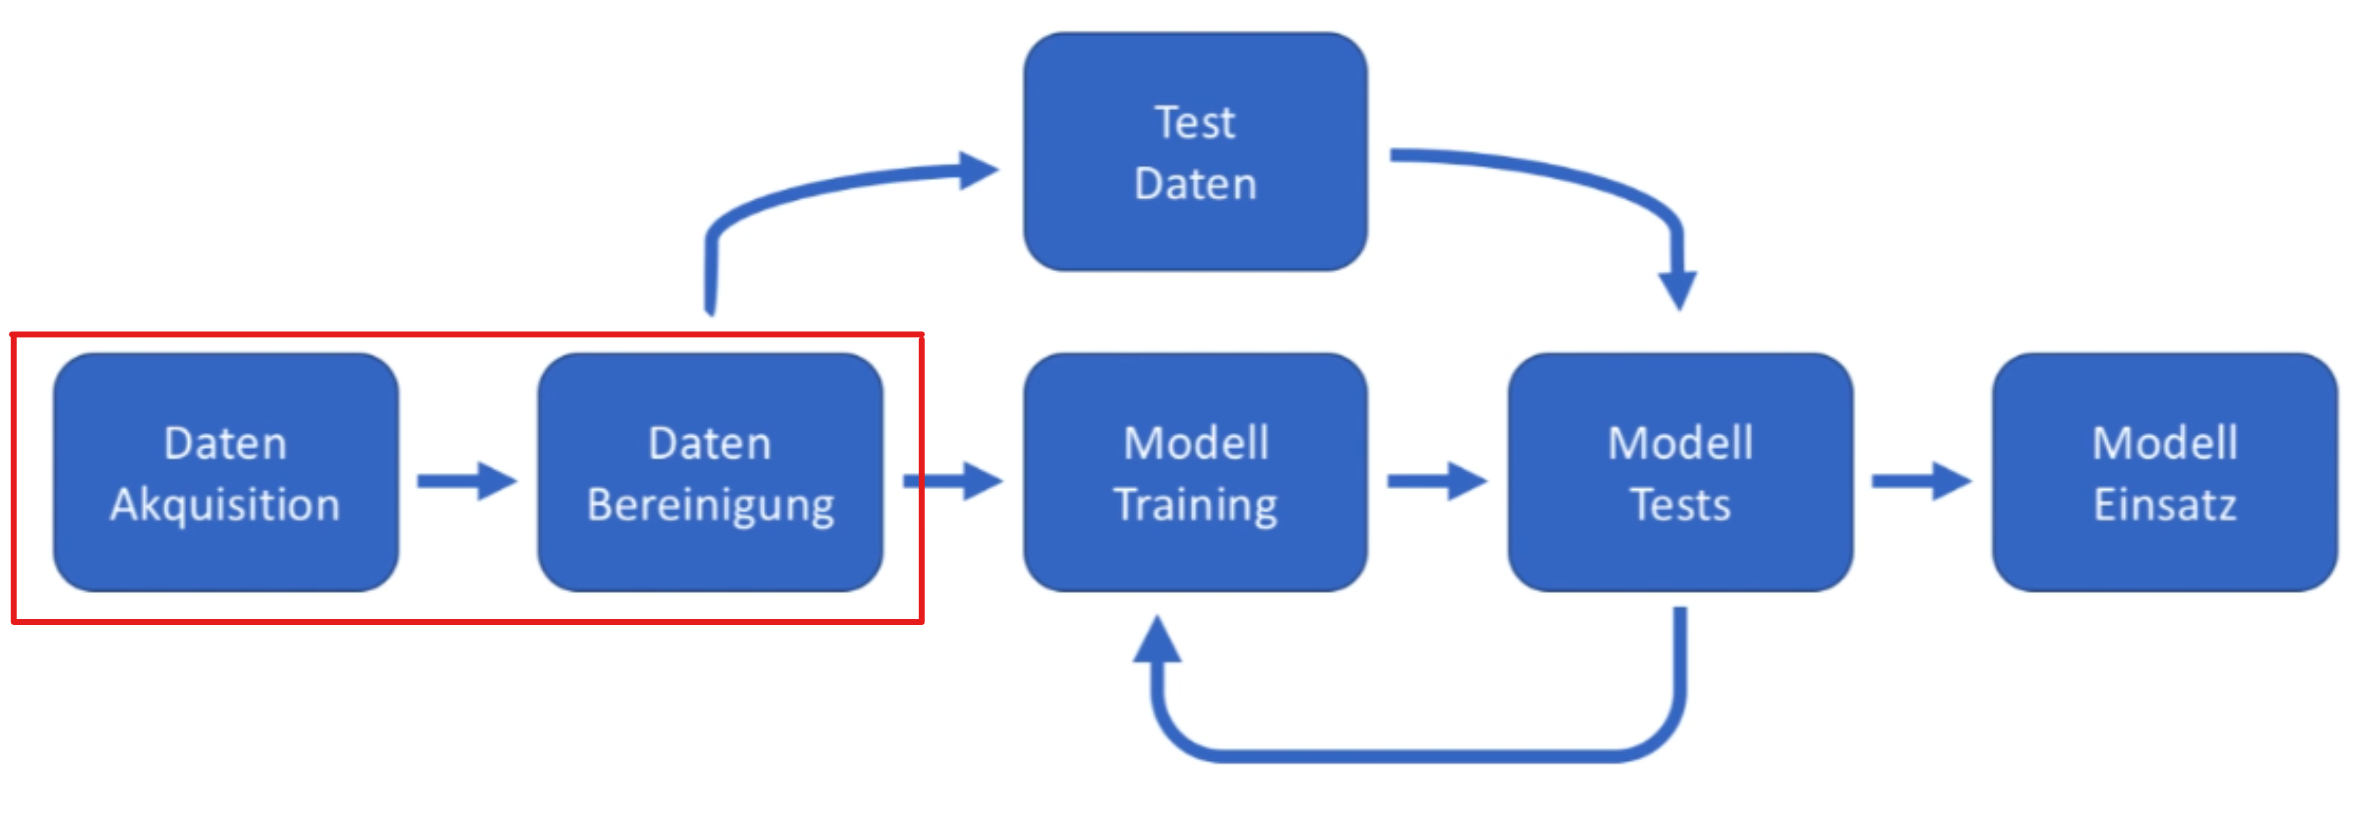

(adaptiert von Seminar Künstliche Intelligenz 16. und 17. Juni St.Polten/Online)